### BMI Analysis Based on Gender and Body Measurements 
* Name:LI WAN
* Student Number:223718804
* E-mail:s223718804@deakin.edu.au
* Course:SIT731

---

### Introduction
In this report, the body measurements of more than 4000 males and females in 2020 are selected: "weight (kg)", "height (cm)", "upper arm len. (cm)", "upper leg len. (cm)", "arm (cm)", "hip (cm)", "waist (cm)", "waist (cm)", "waist (cm)", and the distribution of BMI data for males and females are calculated and the characteristics are also compared. Furthmore, based on the male samples, this report explores the correlation between BMI and body measurements.

### BMIs Analysis Based on Gender
Firstly, BMIs are calculated for the samples, and the characteristics of the BMI data for both men and women can be observed.

In [112]:
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [113]:
# Read the sample data
male=np.genfromtxt("https://raw.githubusercontent.com/gagolews/" +
"teaching-data/master/marek/nhanes_adult_male_bmx_2020.csv",
delimiter=",")[1:, :] # skip first row (column names)
female=np.genfromtxt("https://raw.githubusercontent.com/gagolews/" +
"teaching-data/master/marek/nhanes_adult_female_bmx_2020.csv",
delimiter=",")[1:, :] # skip first row (column names)

male_columns = np.array([
"weight (kg)",
"height (cm)", 
"upper arm len. (cm)",
"upper leg len. (cm)",
"arm (cm)",
"hip (cm)",
"waist (cm)" 
])

female_columns = np.array([
"weight (kg)",
"height (cm)", 
"upper arm len. (cm)",
"upper leg len. (cm)",
"arm (cm)",
"hip (cm)",
"waist (cm)"
])

In [114]:
#According to the Wikipedia definitions of BMI, we can calculate BMI
male_BMI = [male_weight / ((male_height / 100) ** 2) for male_height, male_weight in zip(male_heights, male_weights)]

female_BMI = [female_weight / ((female_height / 100) ** 2) for female_height, female_weight in zip(female_heights, female_weights)]

In [115]:
# Calculate male aggregates
arithmetic_male_mean = np.mean(male_BMI)
male_minimum = np.min(male_BMI)
male_Q1 = np.percentile(male_BMI, 25)
male_median = np.median(male_BMI)
male_Q3 = np.percentile(male_BMI, 75)
male_maximum = np.max(male_BMI)
male_standard_deviation = np.std(male_BMI)
male_IQR = male_Q3-male_Q1
male_Skew = st.skew(male_BMI, axis=0, bias=True)

# Calculate female aggregates
arithmetic_female_mean = np.mean(female_BMI)
female_minimum = np.min(female_BMI)
female_Q1 = np.percentile(female_BMI, 25)
female_median = np.median(female_BMI)
female_Q3 = np.percentile(female_BMI, 75)
female_maximum = np.max(female_BMI)
female_standard_deviation = np.std(female_BMI)
female_IQR = female_Q3-female_Q1
female_Skew = st.skew(female_BMI, axis=0, bias=True)

# Display aggregates
print(f'\t\tMale\t\tFemale')
print(f'BMI Mean\t{arithmetic_male_mean:.2f}\t\t{arithmetic_female_mean:.2f}')
print(f'Median\t\t{male_median:.2f}\t\t{female_median:.2f}')
print(f'Min \t\t{male_minimum:.2f}\t\t{female_minimum:.2f}')
print(f'Max \t\t{male_maximum:.2f}\t\t{female_maximum:.2f}')
print(f'Std\t\t{male_standard_deviation:.2f}\t\t{female_standard_deviation:.2f}')
print(f'IQR \t\t{male_IQR:.2f}\t\t{female_IQR:.2f}')
print(f'Skew \t\t{male_Skew:.2f}\t\t{female_Skew:.2f}')

		Male		Female
BMI Mean	29.14		30.10
Median		28.27		28.89
Min 		14.91		14.20
Max 		66.50		67.04
Std		6.31		7.76
IQR 		7.73		10.01
Skew 		0.97		0.92


With the statistical values of BMI: mean, median, min max, std, IQR, skew, we can see that the male sample has larger minimum and maximum values than the female sample, but the mean, median, std, and IQR are relatively smaller. The skewness of both the male and female samples is positively skewed and less than 1.  
Overall the two sets of data are relatively close to each other in terms of center position, and both are somewhat right skewed, but the degree of right skewness may not be very significant as the skewness values are not particularly large, and we can visualize the shape of the data distributions by plotting histograms and boxplots to understand the characteristics of the data in more depth.

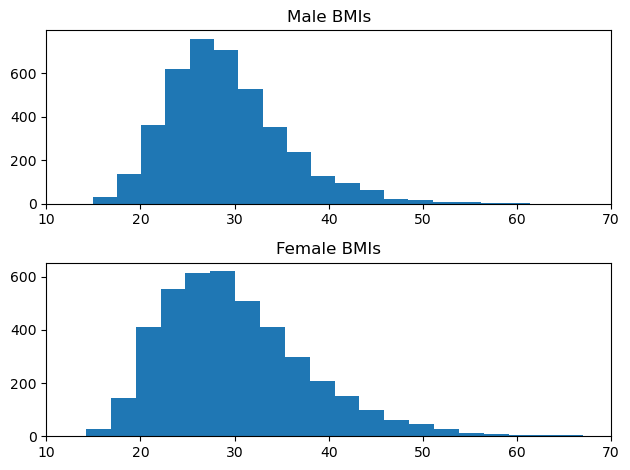

In [116]:
# Draw BMIs histagrams
plt.subplot(2, 1, 1)
plt.hist(male_BMI, bins=20)
plt.title("Male BMIs")
plt.xlim(10, 70) 

plt.subplot(2, 1, 2) 
plt.hist(female_BMI, bins=20)
plt.title("Female BMIs")
plt.xlim(10, 70) 

plt.tight_layout()
plt.show()

We can observe the distribution of the samples in the histograms. Both male and female BMIs' data are close to a normal distribution and more extremes in the right tail for the female sample. Next, we can draw boxplots to compare the extremes of the two data sets.

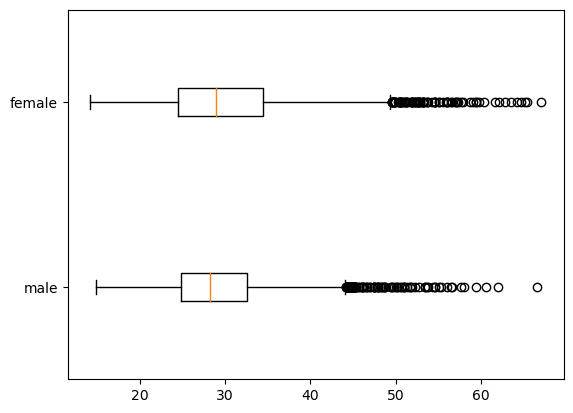

In [117]:
# Draw BMIs boxplot
plt.boxplot([male_BMI,female_BMI], vert=False, positions=[1, 2])

# Set y title
plt.yticks([1, 2], ["male", "female"])

# Set graph title
#plt.title("Female and Male BMI Comparison")
#plt.xlabel("BMI")

plt.show()

Through the above boxplots, it is seen that the mean value of female is greater, and the extreme values of the female and males are both distributed above the mean value, with the extreme values occurring mainly between 43-50 for males and between 50-55 for females.  
It can be observed from the above sample data that men and women are more likely to be at risk of overweight than malnutrition, and that women are at higher risk.

### BMI Impact Factor Analysis
To further find out the relationship between body measurements and BMI, we can analyze it by looking at the scatter plot matrix and calculating the correlation coefficient.
Firstly, we will plot the scatter plot matrix.

In [118]:
# Update the male with BMI array
male_with_BMI=np.column_stack((male[:, :],male_BMI))

z_scores_male = scipy.stats.zscore(male_with_BMI, axis=0)

z_scores_male_columns= np.array([
"weight",
"height", 
"upper arm len",
"upper leg len",
"arm",
"hip",
"waist",
"BMI"
])

# Get indices that would sort the BMI column in z_scores_male
sorted_indices = np.argsort(z_scores_male[:, z_scores_male_columns == "BMI"])

# Get the rows corresponding to the five lowest and five highest BMIs
sorted_indices_descending = np.argsort(male_with_BMI[:, -1])[::-1]

lowest_bmi_indices = sorted_indices_descending[-5:]
highest_bmi_indices = sorted_indices_descending[:5]

lowest_bmi_data = z_scores_male[lowest_bmi_indices]
highest_bmi_data = z_scores_male[highest_bmi_indices]

# Print the results
print("The lowest BMIs:")
print(lowest_bmi_data)


print("\nThe highest BMIs:")
print(highest_bmi_data)

The lowest BMIs:
[[-2.20200207 -1.46538798 -2.01793256 -0.69723101 -2.43134027 -2.00609404
  -2.15188025 -2.14825837]
 [-1.93588242  0.04868155 -0.4167394  -0.32392103 -2.41044203 -1.99790426
  -2.0914162  -2.16852329]
 [-1.81449451  0.68824541 -0.49885187  0.92044555 -2.49403502 -1.84229849
  -2.07932339 -2.17225565]
 [-1.88919476  0.54466985 -0.4167394   0.51602641 -2.47313677 -1.80953939
  -1.91002404 -2.22194907]
 [-2.40742777 -2.18326577 -0.70413304 -0.3550302  -3.20457542 -2.04704292
  -1.31747631 -2.25481139]]

The highest BMIs:
[[ 5.42676131  0.20530944  0.4043853  -1.00832265  3.9844216   5.23366895
   4.17265973  5.91892052]
 [ 4.81048422  0.25751873  0.15804789  1.6670655   4.02621809  4.30003436
   3.61639044  5.19437961]
 [ 3.32581668 -1.50454495 -1.15575163 -0.63501268  2.5215443   4.40650146
   3.04802834  4.98190486]
 [ 4.34360763  0.12699549  1.75924106  1.1382097   3.2320847   4.00520238
   3.39267345  4.7884639 ]
 [ 4.01679402 -0.05573704  0.4043853  -0.57279435  2.4

In [119]:
def pairplot(X, labels, bins=21, alpha=0.1):
##Draws a scatter plot matrix, given:
###* X - data matrix,
###* labels - list of column names

    assert X.shape[1] == len(labels)
    k = X.shape[1]
    fig, axes = plt.subplots(nrows=k, ncols=k, sharex="col", sharey="row",
    figsize=(plt.rcParams["figure.figsize"][0], )*2)
    for i in range(k):
        for j in range(k):
            ax = axes[i, j]
            if i == j: # diagonal
                ax.text(0.5, 0.5, labels[i], transform=ax.transAxes,
                ha="center", va="center", size="x-small")
            else:
                ax.plot(X[:, j], X[:, i], ".", color="black", alpha=alpha)

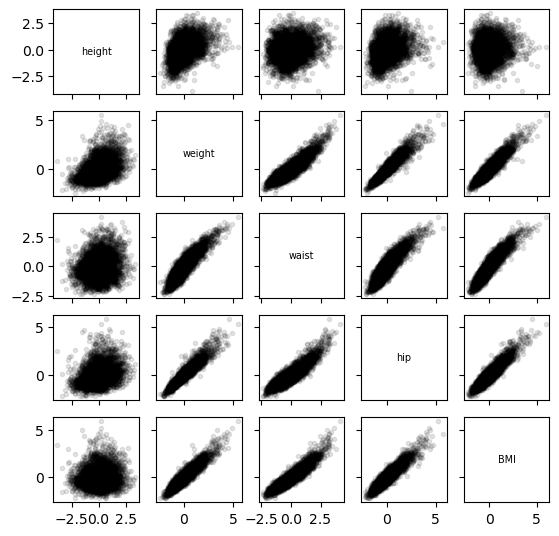

In [120]:
which = [1,0,6,5,7]
pairplot(z_scores_male[:, which], z_scores_male_columns[which])
plt.show()

By observing the scatter plot matrix, it can be seen that weight has a positive relationship with waist,hip, wasit has a positive relationship with hip, and weight,wait, hip and BMI all have positive relationships.  
Both the Pearson correlation coefficient (r) and the Spearman rank correlation coefficient (ρ) are statistics used to measure the degree of association between two variables. The choice of whether to use Pearson or Spearman depends on properties and assumptions about the relationship of the data. If the data have a linear relationship and are not disturbed by outliers, Pearson may be chosen.If there is uncertainty as to whether the relationship is linear or nonlinear, or if the data contain outliers, Spearman may be more appropriate.
Although a linear relationship is initially apparent from the scatter plot matrix, to further explore the correlation between body measurements, we can calculate both the Pearson'r and the Spearman'ρ and compare them.

In [121]:
def corrheatmap(R, labels):
    """
    Draws a correlation heat map, given:
    * R - matrix of correlation coefficients for all variable pairs,
    * labels - list of column names
    """
    assert R.shape[0] == R.shape[1] and R.shape[0] == len(labels)
    k = R.shape[0]

    # plot the heat map using a custom colour palette
    # (correlations are in [-1, 1])
    plt.imshow(R, cmap=plt.colormaps.get_cmap("RdBu"), vmin=-1, vmax=1)

    # add text labels
    for i in range(k):
        for j in range(k):
            plt.text(i, j, f"{R[i, j]:.2f}", ha="center", va="center",
                     color="black" if np.abs(R[i, j]) < 0.5 else "white")

    plt.xticks(np.arange(k), labels=labels, rotation=30)
    plt.tick_params(axis="x", which="both", labelbottom=True, labeltop=True, bottom=False, top=False)
    plt.yticks(np.arange(k), labels=labels)
    plt.tick_params(axis="y", which="both", labelleft=True, labelright=True, left=False, right=False)
    plt.grid(False)


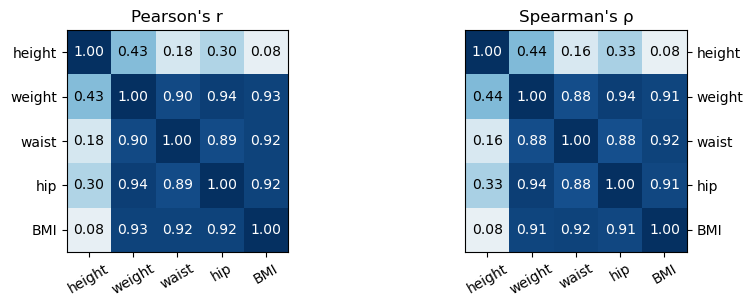

In [123]:
plt.figure(figsize=(8, 20))

plt.subplot(1, 2, 1)
R = np.corrcoef(z_scores_male, rowvar=False)
order = [1, 0, 6, 5, 7] # chiefly for aesthetics
corrheatmap(R[np.ix_(order, order)], z_scores_male_columns[order])
plt.title("Pearson's r")

# Adjust ticklable location 
plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
plt.tick_params(right=False, labelright=False, left=True, labelleft=True)

plt.subplot(1, 2, 2) 
spearman_corr_matrix, _ = st.spearmanr(z_scores_male, axis=0)
order = [1, 0, 6, 5, 7] # chiefly for aesthetics
corrheatmap(spearman_corr_matrix[np.ix_(order, order)], z_scores_male_columns[order])
plt.title("Spearman's ρ")

plt.tick_params(top=False, labeltop=False, bottom=True, labelbottom=True)
plt.tick_params(right=True, labelright=True, left=False, labelleft=False)


plt.subplots_adjust(wspace=0.8)

plt.show()

The above figures show that the values of Pearson's r and Spearman's ρ are essentially the same. Where weight does have a high correlation with waist,hip and BMI has a high correlation with weight,waist,hip. But the correlation between height and weight,Waist,hip,BMI is weak. Therefore, it can be seen through the sample that weight has a very strong influence on BMI.

### Conclusion
In conclusion, the comprehensive analysis of body measurements and BMI data for over 4000 males and females in 2020 reveals distinct characteristics and trends. The statistical comparison of BMI values between genders indicates that while males exhibit larger minimum and maximum values, the mean, median, standard deviation, and interquartile range are relatively smaller than those of females. Both datasets display a positive skewness, suggesting a tendency towards higher BMI values. Histograms and boxplots illustrate the data distributions, indicating a closer-to-normal distribution for both genders with slight right skewness, particularly pronounced in females. Moreover, females tend to have a higher mean BMI and more extreme values in the right tail. The scatter plot matrix reveals positive relationships between various body measurements and BMI, with weight showing a particularly strong influence. Both Pearson and Spearman correlation coefficients confirm these findings, emphasizing the significance of weight in influencing BMI.  
Overall, this analysis provides valuable insights into the distribution and relationships within the dataset, offering a comprehensive understanding of the interplay between body measurements and BMI in the studied population.

### Reference
https://en.wikipedia.org/wiki/Body_mass_index